<a href="https://colab.research.google.com/github/Nebius-Academy/LLM-Engineering-Essentials/blob/main/topic6/6.1_intro_to_model_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Engineering Essentials by Nebius Academy

Course github: [link](https://github.com/Nebius-Academy/LLM-Engineering-Essentials/tree/main)

The course is in development now, with more materials coming soon. [Subscribe to stay updated](https://academy.nebius.com/llm-engineering-essentials/update/)

### Before we start

LLM fine tuning is traditionally a very complex topic, because of so many different techniques and taxonomies: Supervised Finetuning, Instruction Tuning, PEFT, LoRA, Full Finetuning, Human Alignment, Reinforcement Learning from Human Feedback and so on. The situation becomes worse because some teams use different terms to describe the same processes. In Topic 6 of the LLM Engineering Essentials course we try to cover the taxonomy of finetuning of LLMs and give concrete examples how to apply each different technique.

### A little bit of history from 2023

Historically by `Training Pipeline Phases` people usually assumed 3 different steps:

1) Pre-training

2) Post-Training

3) Human Alignment

This was very heavily popularized in 2023 by Andrej Karpathiy and his "GPT Assistant Pipeline" tutorial at [Misrosoft Build](https://www.youtube.com/watch?v=bZQun8Y4L2A):



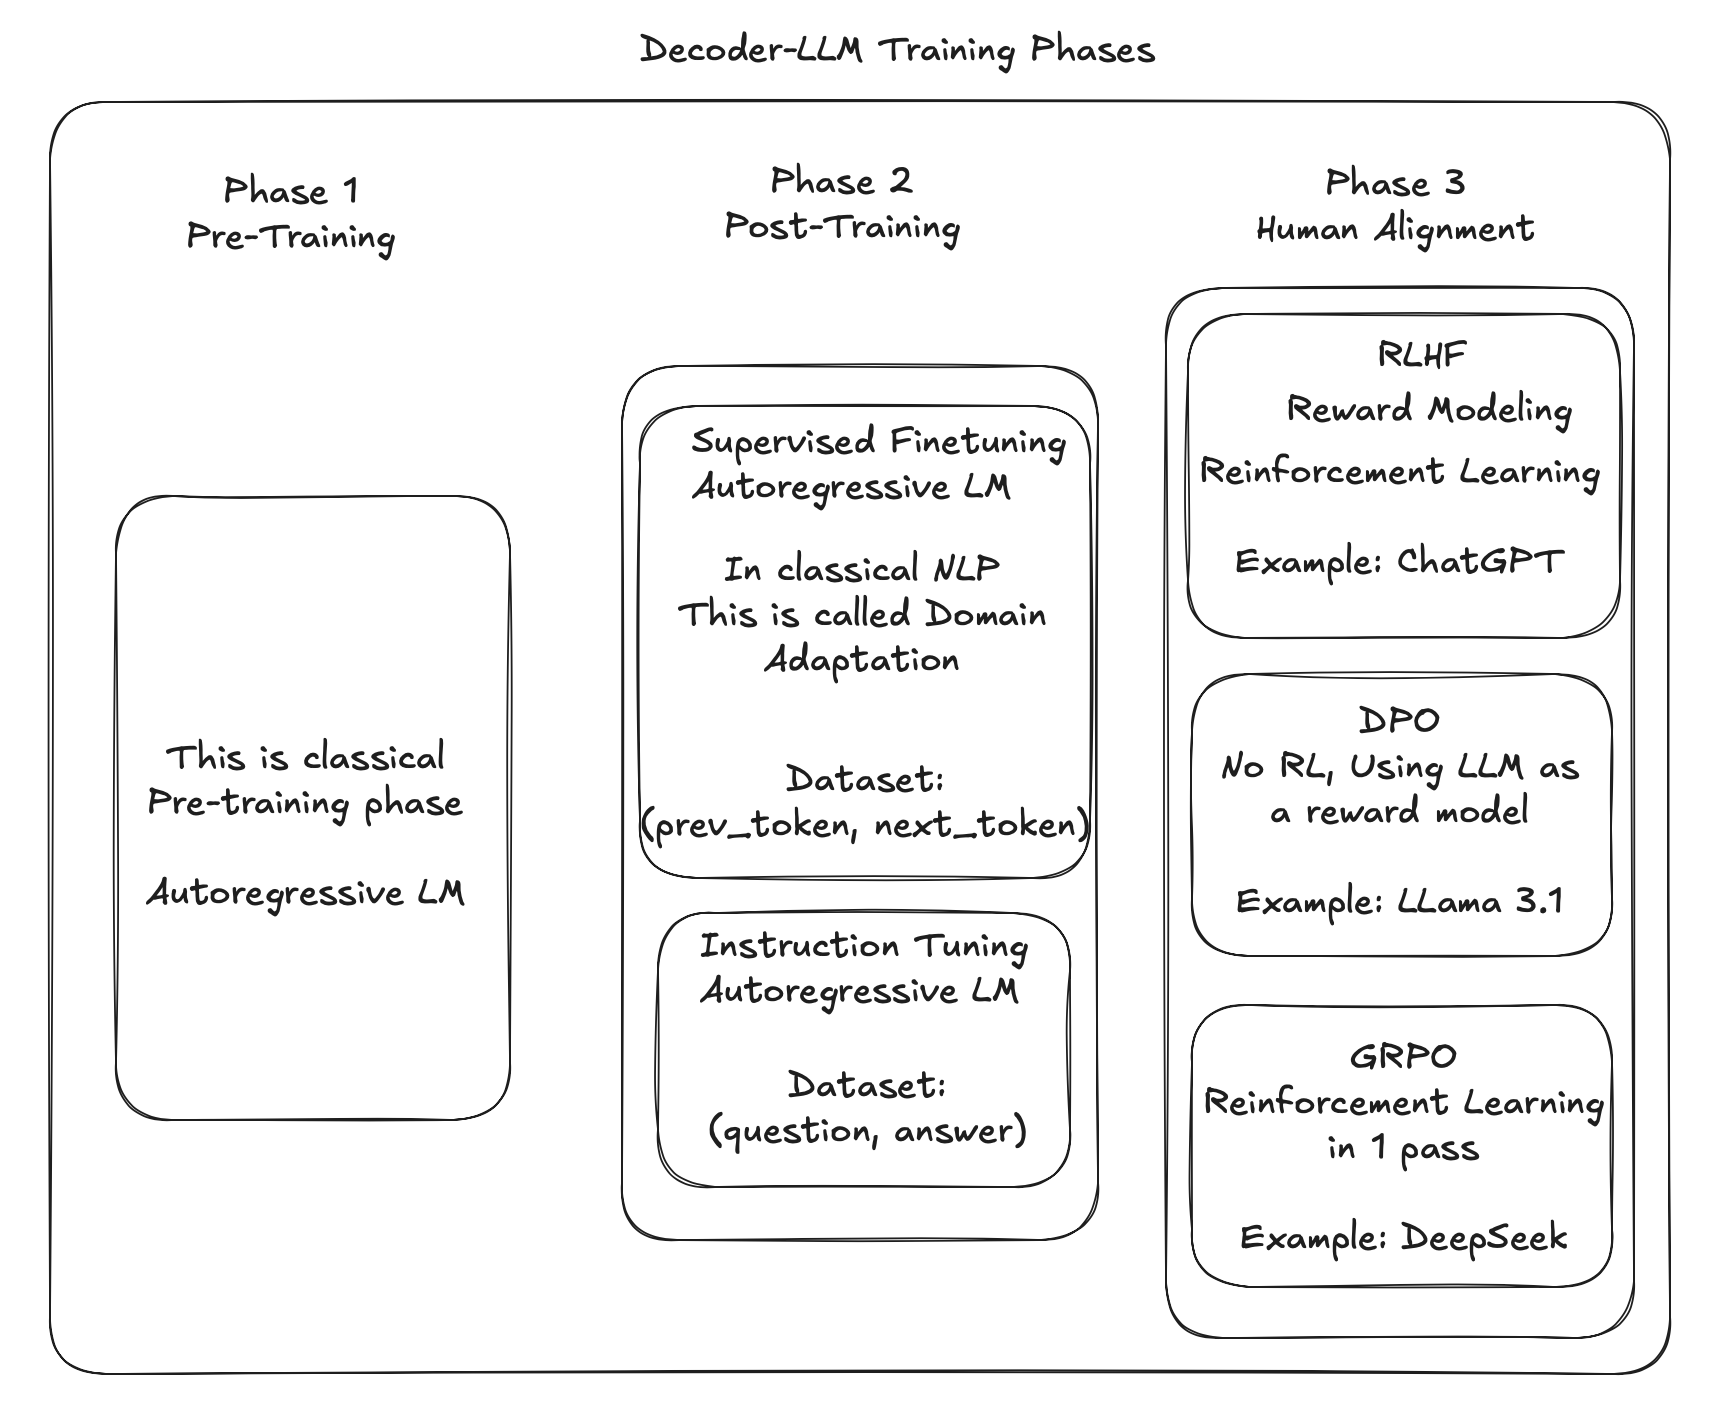

### But how have things changed in 2025?

Right now the three-step pipeline idea is a little outdated, and we have just 2 phases:

1. **Pre-training**. Includes all self-supervised learning approaches with Casual LM and Masked LM.

2. **Post-training**. Includes both supervised (and sometimes self-supervised) approaches and RL training.

Distinguishing between just two stages is more convenient, because in 2025 we have seen how many different techniques and goals actually exist in post-training, not just Alignment, but also long-reasoner training, tuning for agentic scenarios and more.

Moreover, the pipeline composition might be more complex than just SFT + RL. For example, DeepSeek-R1 was obtained from DeepSeek-V3 through a combination of cold-start SFT, RL with GRPO to establish long reasoning capabilities, and then another turn of RL for alignment purposes.

At the same time, some teams actually skip the Human Alignment, relying on the high-quality pre-training and Instruction Tuning data. Mistral and Microsoft's Phi models are famous for not doing any RLHF/DPO, and just doing pre-train and SFT.

## Fine tuning techniques

From the algorithmic point of view, fine tuning can be divided into

* **Supervised Finetuning** (**SFT**), which requires data in the form `(prompt, desired_comletion)`.

* **RL training**. It requires a **reward** , which can be either a deterministic one, such as answer accuracy, or a trained **reward model**. An LLM is trained through trial and error to maximize the reward it gets for its completions. We'll discuss it in more details in the notebook 6.3.


A very special case of Supervised Funetuning is **DPO** (**Direct Preference Optimization**). It's so special that it's often grouped with RL (despite not being RL), because:

* It's used for Alignment Training, which was traditionally an arena of RL methods
* It trains LLMs on triplets `(prompt, accepted_completion, rejected_completion)`, unlike ordinary SFT

The three colab notebooks of this topic cover three important fine tuning tactics:

* **Supervised Finetuning** - it's this notebook
* [**DPO** (Direct Preference Optimization)](https://colab.research.google.com/github/Nebius-Academy/LLM-Engineering-Essentials/blob/main/topic6/6.2_dpo.ipynb)
* [**RLHF** (Reinforcement Learning with Human Feedback) with PPO (Proximal Policy Optimization) under the hood](https://colab.research.google.com/github/Nebius-Academy/LLM-Engineering-Essentials/blob/main/topic6/6.3_rlhf.ipynb)

And if you want to know more about fine tuning and particular approaches, don't hesitate to check the long reads of Topic 6.

#### Important comment

In this notebook we are talking about LLMs, or more accurately, about decoder-only transformers.

We'll talk about fine-tuning of encoder-only transformers (embedding models) in the fourth notebook of Topic 6

#### Human Alignment
In Chapter 6 we will talk about several steps of Post-Training - including Human Alignment.

Human Alignment is what allowed GPT 3.5 to jump in the quality to the levels of ChatGPT. Human Alignment can be done through several different methods (RLHF, DPO, GRPO). Specifically in ChatGPT Human Alignment phase was done through RLHF process, which itself consists of Reward Modeling and RL.

There are several techniques for doing Human Alignment, most famours are 3 of them, which we will study in next notebooks:

1) Human Alignment through RLHF (this is what Open AI did with ChatGPT)
It was introduced in the paper `InstructGPT` - https://arxiv.org/pdf/2203.02155

2) Human Alignment through DPO (this is what Meta did with Llama 3.1) - `DPO` was introduced in the paper - https://arxiv.org/pdf/2305.18290

3) Human Alignment through GRPO (This is what DeepSeek did with DeepSeekv3) - This is a new approach which has a lot of discussion around it right now - https://arxiv.org/pdf/2402.03300

All these 3 techniques for Human Alignment are covered in the following notebooks.

For this notebook we are focusing on Post-Training phase, specifically on Finetuning of some GPT-like LLM, that was pre-trained before.

# SFT (Supervised Finetuning)

### What is actually SFT?

SFT very often happens as the first step during post-training. There are usually 2 goals of SFT:

#### Goal # 1 (Domain Adaptation)
- Introduce some in-domain specifics into the model, or how people say "make the model more domain-oriented". This is done through simple autoregressive supervised finetuning on a standalone corpus of topic-relevant data.

  The data might contain just domain-oriented texts, making SFT just a continuation of the pre-training process. It can be of the form `(prompt, completion)` as well. However, SFT isn't supposed to bring new knowledge to the LLM (you need too much data for that). Instead, you might help the model to cope with relevant terminology or style.

  If you worked in classical NLP before, this was called **Domain Adaptation** (Sebastian Ruder, Phd Thesis: https://www.ruder.io/thesis/ )

#### Goal #2 (Instruction Tuning)
- Introduce some sort of instruction-following, or how people say "make the model ready for chat/instruction following". This is done through the same autoregressive supervised finetuning, but the data is always represented as tuples `(question, answer)`. It was popularized in the `T5` paper - https://arxiv.org/pdf/1910.10683

  Instruction tuning often teaches an LLM to produce completions of specific format or style - or to understand specific prompt formats.


Example of SFT Type I: https://huggingface.co/mistralai/Mistral-7B-v0.3

Example of SFT Type II: https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3


### Ok, but how is it different from Prompt Engineering?

After reading about the purpose of SFT and how it changes the behaviour of the model, attentive reader might ask "Ok, but how is it different from Prompt Engineering? Why do I need SFT if I can just make the promp and ask for behavioural change?"

**Similarities between SFT and Prompt Engineering**

From the point of outcome results, SFT and Prompt Engineerng influence the behaviour of the model: both approaches change how the model responds to the prompts.

**Differences between SFT and Prompt Engineering**

Prompt Engineering does not update the weights of the model and can be done in real-time to modify the behaviour. SFT requires the update step where the actual weights of the model will be changed. In some sense SFT is more profound change.

On one side, fine tuning is more costly. On the other side, it decreases inference costs (no need for long prompts) and is more efficient in format establishing.

### Ok, what is PEFT and Lora and all other terms?

There are several machine learning methods related to fine tuning, including:

- **Linear Probing**. Plugging a linear head into any place of a frozen transformer and training it for a certain goal, you can try to learn something about how information is represented inside an LLM. For example, you can probe an LLM for its "understanding" of geography by training a linear probe on geography-related data to classify countries or directions.

 Researchers usually freeze the LLM weights, only training a linear model as a probe, but several other modifications exist as well.

- **Sparse autoencoders** are another, more powerful way of getting into the inside of LLMs. They allow to disentangle meaningful features from LLMs' internal representations. See, for example, [this paper from Anthropic](https://transformer-circuits.pub/2024/scaling-monosemanticity/)
- **Full Finetuning**. This method unfreezes all weights of the model and updates all parameters. It can potentially lead to better results, but [often suffers from "catastrophic forgetting"](https://arxiv.org/pdf/1612.00796). It's also quite costly - you need around 4 times more memory that the LLM's weights required
- **PEFT (Parameter Efficient Finetuning)**. This is a broad set of techniques all of which somehow update only the fraction of the model's parameters. Sometimes Linear Probing is considered as part of PEFT (though their goals are different). Most notable PEFT methods:
  - [**LoRA**](https://medium.com/nebius/fundamentals-of-lora-and-low-rank-fine-tuning-e748f2f1255d) - Low Rank Adaptation
  - **QLoRA** - Quantized Low Rank Adaptation
  - **Prompt Tuning**

In this notebook we will do **Full Finetuning** to get first familiarity with the basic process. In the notebooks 6.2 and 6.3 we'll do PEFT with QLora.

### Ok, what is API-based SFT and self-hosted SFT?

Depending on whether you use API-based or self-hosted LLMs, your fine tuning journey might be different.

This notebook demonstrates SFT for self-hosting LLM, which is quite straightforward, because you can do anything with the model as long as you have enough compute and data.

With some API providers, [including Nebius AI Studio](https://docs.nebius.com/studio/fine-tuning), you can also order API-hosted SFT. In this case you just submit the `SupervisedTuningJob` into the platform and wait for the results.

# The task at hand: making LLM's generation grounded in citation

### Problem Definition

Today, LLMs are known for generating hallucinations, which limits their adoption in the broader fields. We will take the pre-trained LLM and we will try to reduce halucinations by forcing LLM to always output the "citations" component.

#### Formal definition
We will finetune the model such that it will generate the response + it will output the citations of the context it was using. This model behaviour is called **grounding**.

### Our Objective

We will fine-tune the model such that it always generates the list of citations in the end in the specific format.

#### Example
Before fine-tuning:
```
Q: What is the purpose of Norepinephrine?
A: Norepinephrine is a neurotransmitter that is released from the sympathetic nervous system, and it is involved in the regulation of the body's response to stress.
```

After fine-tuning:
```
Q: What is the purpose of Norepinephrine?
A: Norepinephrine is a neurotransmitter [260104] that is released from the sympathetic nervous system, and it is involved in the regulation of the body's response to stress [283012].

References:
[260104] The role of noradrenaline and adrenaline in the nervous circuitry ...
[283012] Stress-induced reactions of the body provoke increase in levels of ...
```



#### Why is it so cool?

Several empirical experiments suggest that *grounding* an LLM and forcing it to always cite "references" actually leads to slight increases in the **factuality score**. If you put the finetuned model into Evidently.AI and examine its factuality score, there's a big chance the model will score higher compared to a non-grounded model.

There's a long-lasting big debate whether "finetuning can decrease hallucinations or not", but grounding actually helps more often than not.

### Dataset preparation

In order to finetune the model, we will use the dataset in the `(question, answer)` format. The `answer` will always contain some citations that were used in order to generate truthful answer.

In [ ]:
!pip install datasets==2.14.4

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
import pandas as pd

df = pd.read_csv('with_sft.csv')
df

,Unnamed: 0.1,Unnamed: 0,id,question,answer,relevant_passage_ids,n_docs,prompt,sft
0,0,3,3,Are long non coding RNAs spliced?,Long non coding RNAs appear to be spliced thro...,"[22955974, 21622663, 22707570, 22955988, 24285...",6,Question: Are long non coding RNAs spliced?\nC...,Long non coding RNAs appear to be spliced thro...
1,1,7,7,Which acetylcholinesterase inhibitors are used...,Pyridostigmine and neostygmine are acetylcholi...,"[21328290, 21133188, 15610702, 20663605, 21815...",6,Question: Which acetylcholinesterase inhibitor...,Acetylcholinesterase inhibitors are used for t...
2,2,11,11,Which are the classes of anti-arrhythmic drugs...,Antiarrhythmic drugs can be divided into four ...,"[10810787, 9803978, 1290288, 7875632, 11564050]",5,Question: Which are the classes of anti-arrhyt...,Antiarrhythmic drugs can be divided into four ...
3,3,13,13,Which are the major characteristics of cellula...,The defining characteristics of cellular senes...,"[18976161, 9624027, 8824885]",3,Question: Which are the major characteristics ...,The defining characteristics of cellular senes...
4,4,19,19,Which currently known mitochondrial diseases h...,Mutations in the POLG gene have emerged as one...,"[20927567, 12825077, 22647225, 15351195, 18546...",5,Question: Which currently known mitochondrial ...,Mutations in the POLG gene have emerged as one...
...,...,...,...,...,...,...,...,...,...
2100,2100,4707,4707,What is the role of PCAT6 in human cancers?,"PCAT6, is a carcinogenic lncRNA. It is abnorma...","[34885209, 31676070]",2,Question: What is the role of PCAT6 in human c...,"PCAT6, is a carcinogenic lncRNA [34885209]. It..."
2101,2101,4711,4711,Can METTL3 methylate long noncoding RNAs?,"Yes, METTL3 can modulate methylation and expre...",[34505967],1,Question: Can METTL3 methylate long noncoding ...,"Yes, METTL3 can modulate methylation and expre..."
2102,2102,4712,4712,Which disease is caused by repeat expansion in...,An ancestral 10-bp repeat expansion in VWA1 ca...,[33559681],1,Question: Which disease is caused by repeat ex...,I cannot enhance the answer with a citation fr...
2103,2103,4715,4715,What is EpiMethylTag?,"EpiMethylTag is a fast, low-input, low sequenc...",[31752933],1,Question: What is EpiMethylTag?\nContext: Docu...,"EpiMethylTag is a fast, low-input, low sequenc..."


In [ ]:
print(df['prompt'].values[0])

Question: Are long non coding RNAs spliced?
Context: Document # 22955974:
Splicing remains an incompletely understood process. Recent findings suggest that chromatin structure participates in its regulation. Here, we analyze the RNA from subcellular fractions obtained through RNA-seq in the cell line K562. We show that in the human genome, splicing occurs predominantly during transcription. We introduce the coSI measure, based on RNA-seq reads mapping to exon junctions and borders, to assess the degree of splicing completion around internal exons. We show that, as expected, splicing is almost fully completed in cytosolic polyA+ RNA. In chromatin-associated RNA (which includes the RNA that is being transcribed), for 5.6% of exons, the removal of the surrounding introns is fully completed, compared with 0.3% of exons for which no intron-removal has occurred. The remaining exons exist as a mixture of spliced and fewer unspliced molecules, with a median coSI of 0.75. Thus, most RNAs underg

In [ ]:
print(df['sft'].values[0])

Long non coding RNAs appear to be spliced through the same pathway as the mRNAs [22955988, 24285305].

References:
[22955988] The human genome contains many thousands...
[24285305] NONCODE (http://www.bioinfo.org/noncode/) is an...


#### Dataset format explanation

- `df['prompt']` contain text in the format:

  ```Question: {some_question}\n Context: {some_context}\nAnswer:```

  Yes, not only prompts, but also context and answers. Before training, we'll get rid of the answers :)


- `df['sft']` contains the text with the format:

  ```{Some_answer}\n References: {some_references}```
  
  This is our actual target.

### Loading the model

Let's load the model an try it on a prompt.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model_name = "Qwen/Qwen3-0.6B"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float32,
)

print(tokenizer.eos_token, tokenizer.pad_token)
# Very important: unlike other GPT-like models EOS_TOKEN and PAD_TOKEN should not be the same
# Very often in SFT code, you could see something like: tokenizer.eos_token = tokenizer.pad_token
# For Qwen Family of models, this would produce wrong results

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

<|im_end|> <|endoftext|>


In [ ]:
prompts = ["Give me a short introduction to large language model."]
messages = [{"role": "user", "content": prompt} for prompt in prompts]

In [ ]:
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=False
)

In [ ]:
print(text)

<|im_start|>user
Give me a short introduction to large language model.<|im_end|>
<|im_start|>assistant
<think>

</think>




In [ ]:
model_inputs = tokenizer([text], return_tensors='pt').to(model.device)

In [ ]:
generated_ids = model.generate(**model_inputs, max_new_tokens=512)

In [ ]:
generated_ids[0]

tensor([151644,    872,    198,  35127,    752,    264,   2805,  16800,    311,
          3460,   4128,   1614,     13, 151645,    198, 151644,  77091,    198,
        151667,    271, 151668,    271,     32,   3460,   4128,   1614,    320,
          4086,     44,      8,    374,    264,    943,    315,  20443,  11229,
           429,    646,   3535,    323,   6923,   3738,   4128,     13,   1084,
           374,  16176,    389,  12767,  14713,    315,   1467,    311,   3960,
         12624,    323,   7269,   1181,   5726,    311,   3535,    323,   5889,
           311,   3738,  20959,     13,    444,  10994,     82,    525,   1483,
           304,   5257,   8357,   1741,    438,   4378,     11,  14468,     11,
           323,   6002,   2473,     13, 151645], device='cuda:0')

In [ ]:
print(tokenizer.decode(generated_ids[0]))

<|im_start|>user
Give me a short introduction to large language model.<|im_end|>
<|im_start|>assistant
<think>

</think>

A large language model (LLM) is a type of artificial intelligence that can understand and generate human language. It is trained on vast amounts of text to learn patterns and improve its ability to understand and respond to human conversations. LLMs are used in various applications such as writing, translation, and customer service.<|im_end|>


The model seems to work, so let's fine tune it!

### Preparing data

First of all, for the sake of resource preservation (we don't want to get out of memory error + too different lengths in batches reduce efficiency + with too long sequences), we'll restrict sequence lengths by 512 words. In average, it's around 512 * 1.3 tokens.

In [ ]:
MAX_LEN = 512
BPE_FACTOR = 1.3

Let's remove answers from `df['prompt']`, leaving only prompts and contexts:

In [ ]:
df['prompt_no_answer'] = df['prompt'].apply(lambda x: x.split('Answer:')[0])

Applying chat templates:

In [ ]:
df['formatted_prompt_no_answer'] = df['prompt_no_answer'].apply(lambda x: tokenizer.apply_chat_template(
    [{"role": "user", "content": x}],
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=False
))

In [ ]:
print(df['formatted_prompt_no_answer'].values[1])

<|im_start|>user
Question: Which acetylcholinesterase inhibitors are used for treatment of myasthenia gravis?
Context: Document # 21133188:
Myasthenia gravis (MG) is caused by failure of chemical transmission at the neuromuscular junction. It is an autoimmune disorder in which antibodies interfere with neuromuscular transmission. It has a prevalence of around 20 per 100,000. The incidence is bimodal with a 2:1 female to male ratio in the younger population and a reversed sex ratio over the age of 60. Around 15% of cases are associated with a thymoma. MG presents with fatiguable painless muscle weakness. Diplopia and ptosis are the most common presenting features. Around 80% of patients presenting with ocular MG will subsequently develop more generalised weakness. Respiratory muscle weakness is the most serious manifestation of MG and can be fatal. A detailed history is the most valuable tool in the diagnosis of MG. This should elicit the pattern of weakness, severity and diurnal variat

In [ ]:
df['formatted_prompt_with_answer'] = df.apply(lambda x: tokenizer.apply_chat_template(
    [{"role": "user", "content": x['prompt_no_answer']}, {"role": "assistant", "content": x['sft']}],
    tokenize=False,
    add_generation_prompt=False, # VERY IMPORTANT: do not add generation flag for GT (this is QWEN peculiarity)
    enable_thinking=False
), axis=1)

Let's look at formatted prompt with answer, which should have both `user` and `assistant` persona

In [ ]:
print(df['formatted_prompt_with_answer'].values[1])

<|im_start|>user
Question: Which acetylcholinesterase inhibitors are used for treatment of myasthenia gravis?
Context: Document # 21133188:
Myasthenia gravis (MG) is caused by failure of chemical transmission at the neuromuscular junction. It is an autoimmune disorder in which antibodies interfere with neuromuscular transmission. It has a prevalence of around 20 per 100,000. The incidence is bimodal with a 2:1 female to male ratio in the younger population and a reversed sex ratio over the age of 60. Around 15% of cases are associated with a thymoma. MG presents with fatiguable painless muscle weakness. Diplopia and ptosis are the most common presenting features. Around 80% of patients presenting with ocular MG will subsequently develop more generalised weakness. Respiratory muscle weakness is the most serious manifestation of MG and can be fatal. A detailed history is the most valuable tool in the diagnosis of MG. This should elicit the pattern of weakness, severity and diurnal variat

Now let's look at the answer only part of the same prompt + answer

In [ ]:
print(df['formatted_prompt_with_answer'].values[1][len(df['formatted_prompt_no_answer'].values[1]):])

Acetylcholinesterase inhibitors are used for the symptomatic treatment of myasthenia gravis [15610702, 21845054, 21815707]. Pyridostigmine is the most widely used acetylcholinesterase inhibitor [21133188, 21815707, 20663605] and is recommended as first-line therapy or considered the drug of choice for symptomatic treatment [21815707, 20663605]. The therapeutic usefulness of extended-release pyridostigmine is being evaluated [20663605], and novel acetylcholinesterase inhibitors with oral antisense oligonucleotides are being developed and studied [21815707].

References:
[21133188] Myasthenia gravis (MG) is caused...
[15610702] Treatment for myasthenia gravis should...
[20663605] INTRODUCTION: For more than 50...
[21815707] Acquired myasthenia gravis (MG) is...
[21845054] Myasthenia gravis is an autoimmune neuromuscular...<|im_end|>



In [ ]:
df = df[df['formatted_prompt_with_answer'].apply(lambda x: len(x.split())) < MAX_LEN] # first we filter everything larger than 512 words
df

,Unnamed: 0.1,Unnamed: 0,id,question,answer,relevant_passage_ids,n_docs,prompt,sft,prompt_no_answer,formatted_prompt_no_answer,formatted_prompt_with_answer
3,3,13,13,Which are the major characteristics of cellula...,The defining characteristics of cellular senes...,"[18976161, 9624027, 8824885]",3,Question: Which are the major characteristics ...,The defining characteristics of cellular senes...,Question: Which are the major characteristics ...,<|im_start|>user\nQuestion: Which are the majo...,<|im_start|>user\nQuestion: Which are the majo...
5,5,24,24,Is Alu hypomethylation associated with breast ...,"Yes, Alu elements were found to be hypomethyla...","[20682973, 24971511]",2,Question: Is Alu hypomethylation associated wi...,"Yes, Alu elements were found to be hypomethyla...",Question: Is Alu hypomethylation associated wi...,<|im_start|>user\nQuestion: Is Alu hypomethyla...,<|im_start|>user\nQuestion: Is Alu hypomethyla...
12,12,41,41,Which factors activate zygotic gene expression...,"Nanog, Pou5f1 and SoxB1 activate zygotic gene ...",[24056933],1,Question: Which factors activate zygotic gene ...,"Nanog, Pou5f1 and SoxB1 activate zygotic gene ...",Question: Which factors activate zygotic gene ...,<|im_start|>user\nQuestion: Which factors acti...,<|im_start|>user\nQuestion: Which factors acti...
17,17,67,67,Is TENS machine effective in pain?,Transcutaneous electrical nerve stimulation is...,"[17333874, 7644247]",2,Question: Is TENS machine effective in pain?\n...,Transcutaneous electrical nerve stimulation is...,Question: Is TENS machine effective in pain?\n...,<|im_start|>user\nQuestion: Is TENS machine ef...,<|im_start|>user\nQuestion: Is TENS machine ef...
18,18,68,68,Is there any algorithm for enhancer identifica...,yes,"[23526891, 22328731]",2,Question: Is there any algorithm for enhancer ...,"yes [23526891, 22328731]\n\nReferences:\n[2352...",Question: Is there any algorithm for enhancer ...,<|im_start|>user\nQuestion: Is there any algor...,<|im_start|>user\nQuestion: Is there any algor...
...,...,...,...,...,...,...,...,...,...,...,...,...
2099,2099,4704,4704,Which is the literature-based database of phen...,PheneBank is a Web-portal for retrieving human...,[34788791],1,Question: Which is the literature-based databa...,PheneBank is a Web-portal for retrieving human...,Question: Which is the literature-based databa...,<|im_start|>user\nQuestion: Which is the liter...,<|im_start|>user\nQuestion: Which is the liter...
2100,2100,4707,4707,What is the role of PCAT6 in human cancers?,"PCAT6, is a carcinogenic lncRNA. It is abnorma...","[34885209, 31676070]",2,Question: What is the role of PCAT6 in human c...,"PCAT6, is a carcinogenic lncRNA [34885209]. It...",Question: What is the role of PCAT6 in human c...,<|im_start|>user\nQuestion: What is the role o...,<|im_start|>user\nQuestion: What is the role o...
2101,2101,4711,4711,Can METTL3 methylate long noncoding RNAs?,"Yes, METTL3 can modulate methylation and expre...",[34505967],1,Question: Can METTL3 methylate long noncoding ...,"Yes, METTL3 can modulate methylation and expre...",Question: Can METTL3 methylate long noncoding ...,<|im_start|>user\nQuestion: Can METTL3 methyla...,<|im_start|>user\nQuestion: Can METTL3 methyla...
2103,2103,4715,4715,What is EpiMethylTag?,"EpiMethylTag is a fast, low-input, low sequenc...",[31752933],1,Question: What is EpiMethylTag?\nContext: Docu...,"EpiMethylTag is a fast, low-input, low sequenc...",Question: What is EpiMethylTag?\nContext: Docu...,<|im_start|>user\nQuestion: What is EpiMethylT...,<|im_start|>user\nQuestion: What is EpiMethylT...


Let's filter out everything longer than 512 words which is roughtly $512 \cdot 1.3$ tokens.


In [ ]:
usual_tokenization_length = [len(x) < MAX_LEN * BPE_FACTOR for x in tokenizer(df['formatted_prompt_with_answer'].values.tolist())['input_ids']]

In [ ]:
df['usual_tokenization_length'] = usual_tokenization_length

/tmp/ipython-input-35-3785683993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['usual_tokenization_length'] = usual_tokenization_length


In [ ]:
df = df[df['usual_tokenization_length']==True]
df

,Unnamed: 0.1,Unnamed: 0,id,question,answer,relevant_passage_ids,n_docs,prompt,sft,prompt_no_answer,formatted_prompt_no_answer,formatted_prompt_with_answer,usual_tokenization_length
5,5,24,24,Is Alu hypomethylation associated with breast ...,"Yes, Alu elements were found to be hypomethyla...","[20682973, 24971511]",2,Question: Is Alu hypomethylation associated wi...,"Yes, Alu elements were found to be hypomethyla...",Question: Is Alu hypomethylation associated wi...,<|im_start|>user\nQuestion: Is Alu hypomethyla...,<|im_start|>user\nQuestion: Is Alu hypomethyla...,True
12,12,41,41,Which factors activate zygotic gene expression...,"Nanog, Pou5f1 and SoxB1 activate zygotic gene ...",[24056933],1,Question: Which factors activate zygotic gene ...,"Nanog, Pou5f1 and SoxB1 activate zygotic gene ...",Question: Which factors activate zygotic gene ...,<|im_start|>user\nQuestion: Which factors acti...,<|im_start|>user\nQuestion: Which factors acti...,True
17,17,67,67,Is TENS machine effective in pain?,Transcutaneous electrical nerve stimulation is...,"[17333874, 7644247]",2,Question: Is TENS machine effective in pain?\n...,Transcutaneous electrical nerve stimulation is...,Question: Is TENS machine effective in pain?\n...,<|im_start|>user\nQuestion: Is TENS machine ef...,<|im_start|>user\nQuestion: Is TENS machine ef...,True
18,18,68,68,Is there any algorithm for enhancer identifica...,yes,"[23526891, 22328731]",2,Question: Is there any algorithm for enhancer ...,"yes [23526891, 22328731]\n\nReferences:\n[2352...",Question: Is there any algorithm for enhancer ...,<|im_start|>user\nQuestion: Is there any algor...,<|im_start|>user\nQuestion: Is there any algor...,True
19,19,73,73,In which breast cancer patients can palbocicli...,Palbociclib is useful for women with hormone r...,"[26236140, 25792301, 25524798]",3,Question: In which breast cancer patients can ...,Palbociclib is useful for women with hormone r...,Question: In which breast cancer patients can ...,<|im_start|>user\nQuestion: In which breast ca...,<|im_start|>user\nQuestion: In which breast ca...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,2099,4704,4704,Which is the literature-based database of phen...,PheneBank is a Web-portal for retrieving human...,[34788791],1,Question: Which is the literature-based databa...,PheneBank is a Web-portal for retrieving human...,Question: Which is the literature-based databa...,<|im_start|>user\nQuestion: Which is the liter...,<|im_start|>user\nQuestion: Which is the liter...,True
2100,2100,4707,4707,What is the role of PCAT6 in human cancers?,"PCAT6, is a carcinogenic lncRNA. It is abnorma...","[34885209, 31676070]",2,Question: What is the role of PCAT6 in human c...,"PCAT6, is a carcinogenic lncRNA [34885209]. It...",Question: What is the role of PCAT6 in human c...,<|im_start|>user\nQuestion: What is the role o...,<|im_start|>user\nQuestion: What is the role o...,True
2101,2101,4711,4711,Can METTL3 methylate long noncoding RNAs?,"Yes, METTL3 can modulate methylation and expre...",[34505967],1,Question: Can METTL3 methylate long noncoding ...,"Yes, METTL3 can modulate methylation and expre...",Question: Can METTL3 methylate long noncoding ...,<|im_start|>user\nQuestion: Can METTL3 methyla...,<|im_start|>user\nQuestion: Can METTL3 methyla...,True
2103,2103,4715,4715,What is EpiMethylTag?,"EpiMethylTag is a fast, low-input, low sequenc...",[31752933],1,Question: What is EpiMethylTag?\nContext: Docu...,"EpiMethylTag is a fast, low-input, low sequenc...",Question: What is EpiMethylTag?\nContext: Docu...,<|im_start|>user\nQuestion: What is EpiMethylT...,<|im_start|>user\nQuestion: What is EpiMethylT...,True


Final dataset assembly:

In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    Trainer,
    TrainingArguments,
    default_data_collator
)
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)
datasets = DatasetDict({
    "train": Dataset.from_pandas(train_df),
    "validation": Dataset.from_pandas(val_df)
})

In [ ]:
datasets['train']

Dataset({
    features: ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'question', 'answer', 'relevant_passage_ids', 'n_docs', 'prompt', 'sft', 'prompt_no_answer', 'formatted_prompt_no_answer', 'formatted_prompt_with_answer', 'usual_tokenization_length', '__index_level_0__'],
    num_rows: 846
})

Let's check the lengths (in words). As you see, everything is below 512:

Text(0, 0.5, 'Count')

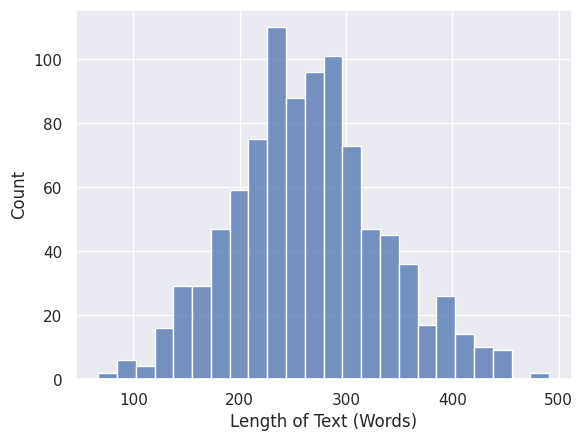

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.histplot(df['formatted_prompt_with_answer'].apply(lambda x: len(x.split())))
plt.xlabel('Length of Text (Words)')
plt.ylabel('Count')

#### What happens next

Before we can proceed with actual training, we need to perform the tokenization.

Below we implemented the function `tokenize_and_mask`, which takes the batch of prompts with and without answers and tokenizes them. The tokenization happens with a trick of applying `[-100]` - this is the standard huggingface method to ignore the tokens during objective function minimization. Why do we want to ignore some tokens if we are doing full finetuning? Because we dont care about gradients that flow through the prompt. We only care about gradients that flow through the desired answer, hence we just mask out all tokens that belong to prompt.

This function is then applied to both datasets.

In [ ]:
max_length = int(MAX_LEN * BPE_FACTOR) # because of BPE

def tokenize_and_mask(batch):
    full_texts = batch["formatted_prompt_with_answer"]   # list of prompt + answer strings
    prompts    = batch["formatted_prompt_no_answer"]     # list of prompt-only strings

    tok_full = tokenizer(
        full_texts,
        truncation=True,
        max_length=max_length,
        return_attention_mask=True,
    )

    input_ids      = tok_full["input_ids"]
    attention_mask = tok_full["attention_mask"]

    labels = []
    for i, (seq_ids, prompt) in enumerate(zip(input_ids, prompts)):
        p_ids     = tokenizer(
            prompt,
            truncation=True,
            max_length=max_length
        )["input_ids"]
        prompt_len = len(p_ids)

        lab = seq_ids.copy()
        lab[:prompt_len] = [-100] * prompt_len
        labels.append(lab)
        all_100 = True
        for x in lab:
            if x!=-100:
                all_100 = False
                break
        if all_100:
            print(f'All tokens will be ignored for sequence #{i}')
            print(len(seq_ids))
            print('------')

    return {
        "input_ids":      input_ids,
        "attention_mask": attention_mask,
        "labels":         labels
    }

tokenized_datasets = datasets.map(
    tokenize_and_mask,
    batched=True,
)

Map:   0%|          | 0/846 [00:00<?, ? examples/s]

Map:   0%|          | 0/95 [00:00<?, ? examples/s]

Let's check whether we have the same correspondence between `input_ids` and `labels`

In [ ]:
ex = tokenized_datasets["train"][192]
print("input_ids[:20]:", ex["input_ids"][-20:])
print("labels   [:20]:", ex["labels"]   [-20:])

input_ids[:20]: [23, 18, 60, 2350, 23609, 266, 519, 323, 22008, 258, 4998, 1609, 320, 2828, 953, 8, 374, 1112, 151645, 198]
labels   [:20]: [23, 18, 60, 2350, 23609, 266, 519, 323, 22008, 258, 4998, 1609, 320, 2828, 953, 8, 374, 1112, 151645, 198]


As we see they match, which is great. However, attentive reader might say, that in order for us to finetune the model in the supervised regime, we actually want to shift the labels by one index forward: to predict $t_1$ from $t_0$. This is absolutely correct, and some people do the shift during preparation of the dataset. However, we will do the shift during training.

To summarize:
- Shift forward by one index for labels can be done within dataset on data level (this is what some people do)
- Shift forward by one index for labels can be done within training, the `labels` in this case mirror the `input_ids` (this is what we are doing)

It's useful to check several predictions BEFORE fine-tuning:

In [ ]:

sample_prompts = df['formatted_prompt_no_answer'].iloc[:5].tolist()
sample_gt = df['formatted_prompt_with_answer'].iloc[:5].tolist()
pretrain_outputs = []
print("=== Before fine-tuning ===")
for i, (p, gt) in enumerate(zip(sample_prompts, sample_gt)):
    print(f'Reference answer #{i}:')
    print(gt)
    print('-----------------------------------')
    print(f'Prediction #{i}:')
    inputs = tokenizer(p, truncation=True, max_length=max_length, return_attention_mask=True, return_tensors="pt").to(model.device)
    out_ids = model.generate(
        **inputs,
        max_new_tokens=128,
        do_sample=True
    )[0]
    prediction = tokenizer.decode(out_ids, skip_special_tokens=True)
    pretrain_outputs.append(prediction)
    print(prediction)
    print("-----------------------------------\n\n\n")

=== Before fine-tuning ===
Reference answer #0:
<|im_start|>user
Question: Is Alu hypomethylation associated with breast cancer?
Context: Document # 24971511:
The changes in DNA methylation status in cancer cells are characterized by hypermethylation of promoter CpG islands and diffuse genomic hypomethylation. Alu and long interspersed nucleotide element-1 (LINE-1) are non-coding genomic repetitive sequences and methylation of these elements can be used as a surrogate marker for genome-wide methylation status. This study was designed to evaluate the changes of Alu and LINE-1 hypomethylation during breast cancer progression from normal to pre-invasive lesions and invasive breast cancer (IBC), and their relationship with characteristics of IBC. We analyzed the methylation status of Alu and LINE-1 in 145 cases of breast samples including normal breast tissue, atypical ductal hyperplasia/flat epithelial atypia (ADH/FEA), ductal carcinoma in situ (DCIS) and IBC, and another set of 129 cases

In [ ]:
from IPython.display import HTML, display

table_template = """<table style="border:1px solid black; table-layout: fixed; width: 100%;" >
  <tr>
    <th style="text-align: center; border:1px solid black; width: 33%;">PREFIX</th>
    <th style="text-align: center; border:1px solid black; width: 33%;">PRETRAIN</th>
    <th style="text-align: center; border:1px solid black; width: 33%;">SFT</th>
  </tr>
{}
</table>"""

# Modified row_template for text wrapping and better alignment
row_template = '''  <tr>
    <td style="border:1px solid black; vertical-align:top;"><pre style="white-space: pre-wrap; word-wrap: break-word; text-align:left; margin: 0;">`{}`</pre></td>
    <td style="border:1px solid black; vertical-align:top;"><pre style="white-space: pre-wrap; word-wrap: break-word; text-align:left; margin: 0;">{}</pre></td>
    <td style="border:1px solid black; vertical-align:top;"><pre style="white-space: pre-wrap; word-wrap: break-word; text-align:left; margin: 0;">{}</pre></td>
  </tr>'''


rows = []

for i, prefix in enumerate(sample_prompts):
    prefix = prefix[0:512] + '...'
    rows.append(row_template.format(prefix, pretrain_outputs[i], None))

display(HTML(table_template.format('\n'.join(rows))))

PREFIX,PRETRAIN,SFT
`<|im_start|>user Question: Is Alu hypomethylation associated with breast cancer? Context: Document # 24971511: The changes in DNA methylation status in cancer cells are characterized by hypermethylation of promoter CpG islands and diffuse genomic hypomethylation. Alu and long interspersed nucleotide element-1 (LINE-1) are non-coding genomic repetitive sequences and methylation of these elements can be used as a surrogate marker for genome-wide methylation status. This study was designed to evaluate the chan...`,"user Question: Is Alu hypomethylation associated with breast cancer? Context: Document # 24971511: The changes in DNA methylation status in cancer cells are characterized by hypermethylation of promoter CpG islands and diffuse genomic hypomethylation. Alu and long interspersed nucleotide element-1 (LINE-1) are non-coding genomic repetitive sequences and methylation of these elements can be used as a surrogate marker for genome-wide methylation status. This study was designed to evaluate the changes of Alu and LINE-1 hypomethylation during breast cancer progression from normal to pre-invasive lesions and invasive breast cancer (IBC), and their relationship with characteristics of IBC. We analyzed the methylation status of Alu and LINE-1 in 145 cases of breast samples including normal breast tissue, atypical ductal hyperplasia/flat epithelial atypia (ADH/FEA), ductal carcinoma in situ (DCIS) and IBC, and another set of 129 cases of IBC by pyrosequencing. Alu methylation showed no significant changes during multistep progression of breast cancer, although it tended to decrease during the transition from DCIS to IBC. In contrast, LINE-1 methylation significantly decreased from normal to ADH/FEA, while it was similar in ADH/FEA, DCIS and IBC. In IBC, Alu hypomethylation correlated with negative estrogen receptor (ER) status, and LINE-1 hypomethylation was associated with negative ER status, ERBB2 (HER2) amplification and p53 overexpression. Alu and LINE-1 methylation status was significantly different between breast cancer subtypes, and the HER2 enriched subtype had lowest methylation levels. In survival analyses, low Alu methylation status tended to be associated with poor disease-free survival of the patients. Our findings suggest that LINE-1 hypomethylation is an early event and Alu hypomethylation is probably a late event during breast cancer progression, and prominent hypomethylation of Alu and LINE-1 in HER2 enriched subtype may be related to chromosomal instability of this specific subtype. assistant Yes, **Alu hypomethylation is associated with breast cancer**, particularly in subtypes like **HER2-enriched breast cancer (IBC)**. Here's a summary of the findings: - **Alu hypomethylation** was **not significantly different** during the progression of breast cancer, but it **tended to decrease** during the transition from **DCIS to IBC**. - **LINE-1 hypomethylation** **significantly decreased** from normal to ADH/FEA, and was **similar** in ADH/FEA, DCIS, and IBC. - In **",None
"`<|im_start|>user Question: Which factors activate zygotic gene expression during the maternal-to-zygotic transition in zebrafish? Context: Document # 24056933: After fertilization, maternal factors direct development and trigger zygotic genome activation (ZGA) at the maternal-to-zygotic transition (MZT). In zebrafish, ZGA is required for gastrulation and clearance of maternal messenger RNAs, which is in part regulated by the conserved microRNA miR-430. However, the factors that activate the zygotic program ...`","user Question: Which factors activate zygotic gene expression during the maternal-to-zygotic transition in zebrafish? Context: Document # 24056933: After fertilization, maternal factors direct development and trigger zygotic genome activation (ZGA) at the maternal-to-zygotic transition (MZT). In zebrafish, ZGA is required for gastrulation and clearance of maternal messenger RNAs, which is in part regulated by the 

### Final preparations

As we said above the shift forward between `input_ids` and `labels` will happen during training function and not inside of the collation function. Luckily for us HuggingFace implemented this shift within Trainer API. Some people like to do the shift during collation phase, in this case you can use `DataCollatorForLanguageModeling`, however we will use `DataCollatorWithPadding` which does just convenient padding.

In case if you wonder why do we need padding within a batch of text: GPUs can only operate on perfect shaped tensors. If there is a batch with 32 rows, each row must have the same number of values. If some texts are longer than others we need to pad shorter texts or truncate the longer ones.

Also during collation we mask out the pad tokens with `-100` the same way we masked out prompt tokens.

In [ ]:
import torch
from transformers import DataCollatorWithPadding, PreTrainedTokenizerBase
from typing import List, Dict, Any

class SFTDataCollator(DataCollatorWithPadding):
    """
    Extends HF's DataCollatorWithPadding so that it ALSO pads 'labels'
    (which by default would be ignored and left at their original lengths).
    """
    def __call__(self, features: List[Dict[str, Any]]) -> Dict[str, torch.Tensor]:
        labels = [f.pop("labels") for f in features]

        batch = super().__call__(features)

        batch_size, seq_len = batch["input_ids"].shape
        padded_labels = torch.full(
            (batch_size, seq_len),
            fill_value=-100,
            dtype=torch.long,
            device=batch["input_ids"].device
        )
        for i, lab in enumerate(labels):
            length = len(lab)
            if length > seq_len:
                lab = lab[:seq_len]
                length = seq_len
            padded_labels[i, :length] = torch.tensor(lab, dtype=torch.long)

        batch["labels"] = padded_labels
        return batch


#### Let's launch it!

Now we have everything ready and finally can launch the funetuning code.

In case if you want to experiment later with parameters for finetuning main loop, here are some recommendations:
- learning_rate: the most important parameter. Usually is setup to be `1e-5`, but is really dependent on the phase of training.
- weight_decay: this is the regularization coefficient applied to the weights. If you are coming from classical Machine Learning, think about it as `l2` regularization coefficient.
- fp16 - this is to say that we use float 16 with 5 bits for exponent and 10 for mantissa
- bf16 - this is to say that we use 8 bits with exponent and 7 for mantissa. **This option is more preferrable in deep learning!** We are not using half-precision at all

In [ ]:
from transformers import DataCollatorWithPadding

training_args = TrainingArguments(
    output_dir="./qwen3-sft",
    num_train_epochs=1,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    learning_rate=2e-5,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=100,
    logging_steps=100,
    save_steps=100,
    save_total_limit=2,
    fp16=False,
    bf16=False,
    push_to_hub=False
)

data_collator = SFTDataCollator(
    tokenizer,
    padding="longest",
    return_tensors="pt"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer
)

/tmp/ipython-input-48-1171261345.py:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Let's confirm that our dataloader gives us indeed correct results, our `labels` and `input_ids` should match because we dont do any shift within data part.

In [ ]:
# 1. Grab one batch
batch = next(iter(trainer.get_eval_dataloader()))

# 2. For the first example in that batch, find all positions not masked
labels = batch["labels"][0]
valid_idxs = (labels != -100).nonzero(as_tuple=True)[0].tolist()

print("Batch seq_len:", labels.shape[0])
print("Valid token count:", len(valid_idxs))
print("First valid index:", valid_idxs[0])
print("Last  valid index:", valid_idxs[-1])

# 3. Show a little window around the start and end of your answer
start = valid_idxs[0]
end   = valid_idxs[-1]
print("→ input_ids around start:",
      batch["input_ids"][0, start : start+10].tolist())
print("→ labels    around start:",
      labels[start : start+10].tolist())
print("→ input_ids around end:",
      batch["input_ids"][0, end-9 : end+1].tolist())
print("→ labels    around end:",
      labels[end-9 : end+1].tolist())


Batch seq_len: 619
Valid token count: 137
First valid index: 482
Last  valid index: 618
→ input_ids around start: [2740, 41410, 33865, 374, 264, 6733, 369, 32359, 92759, 2805]
→ labels    around start: [2740, 41410, 33865, 374, 264, 6733, 369, 32359, 92759, 2805]
→ input_ids around end: [25, 362, 6884, 8045, 315, 2805, 28806, 1112, 151645, 198]
→ labels    around end: [25, 362, 6884, 8045, 315, 2805, 28806, 1112, 151645, 198]


In [ ]:
tokenizer.decode([151643, 151645])

'<|endoftext|><|im_end|>'

Text(0, 0.5, 'Count')

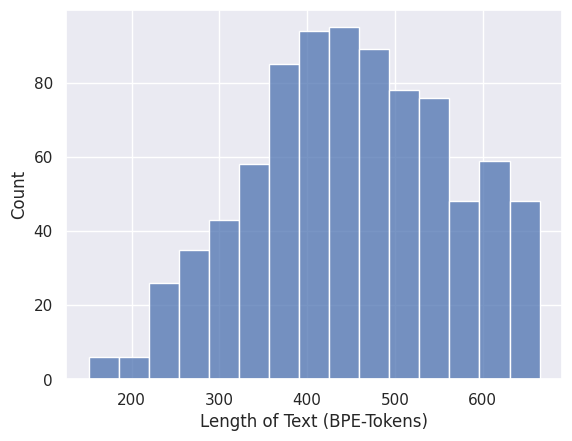

In [ ]:
sns.histplot([len(x['labels']) for x in tokenized_datasets['train']])
plt.xlabel('Length of Text (BPE-Tokens)')
plt.ylabel('Count')

Let's make a pre-SFT evaluation making sure that the loss is not NAN and everything is working end-to-end:

In [ ]:
metrics = trainer.evaluate()
print(metrics)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mishacamry to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'eval_loss': 1.5665117502212524, 'eval_model_preparation_time': 0.0081, 'eval_runtime': 19.0762, 'eval_samples_per_second': 4.98, 'eval_steps_per_second': 4.98}


# Fine tuning and aftermath

The training loop:

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Model Preparation Time
100,0.676500,0.523372,0.008100
200,0.538000,0.516137,0.008100
300,0.543300,0.492658,0.008100
400,0.779400,0.474537,0.008100
500,0.487500,0.473438,0.008100
600,0.483800,0.455958,0.008100
700,0.525600,0.444625,0.008100
800,0.553700,0.435374,0.008100


TrainOutput(global_step=846, training_loss=0.569864933654208, metrics={'train_runtime': 2440.8672, 'train_samples_per_second': 0.347, 'train_steps_per_second': 0.347, 'total_flos': 1009865902915584.0, 'train_loss': 0.569864933654208, 'epoch': 1.0})

Let's check the metrics after SFT to make sure that loss has decreased.

However, actual evaluation should happen manually when we look at the outputs and confirm that model indeed generates the citations.

In [ ]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.43468138575553894, 'eval_model_preparation_time': 0.0081, 'eval_runtime': 20.1315, 'eval_samples_per_second': 4.719, 'eval_steps_per_second': 4.719, 'epoch': 1.0}


Eyeball metric here:

In [ ]:
# Show a few predictions AFTER fine-tuning
posttrain_outputs = []
print("=== After fine-tuning ===")
for i, (p, gt) in enumerate(zip(sample_prompts, sample_gt)):
    print(f'Reference answer #{i}:')
    print(gt)
    print('-----------------------------------')
    print(f'Prediction #{i}:')
    inputs = tokenizer(p, truncation=True, max_length=max_length, return_attention_mask=True, return_tensors="pt").to(model.device)
    out_ids = model.generate(
        **inputs,
        max_new_tokens=128,
        do_sample=True
    )[0]
    prediction = tokenizer.decode(out_ids, skip_special_tokens=True)
    posttrain_outputs.append(prediction)
    print(prediction)
    print("-----------------------------------\n\n\n")

=== After fine-tuning ===
Reference answer #0:
<|im_start|>user
Question: Is Alu hypomethylation associated with breast cancer?
Context: Document # 24971511:
The changes in DNA methylation status in cancer cells are characterized by hypermethylation of promoter CpG islands and diffuse genomic hypomethylation. Alu and long interspersed nucleotide element-1 (LINE-1) are non-coding genomic repetitive sequences and methylation of these elements can be used as a surrogate marker for genome-wide methylation status. This study was designed to evaluate the changes of Alu and LINE-1 hypomethylation during breast cancer progression from normal to pre-invasive lesions and invasive breast cancer (IBC), and their relationship with characteristics of IBC. We analyzed the methylation status of Alu and LINE-1 in 145 cases of breast samples including normal breast tissue, atypical ductal hyperplasia/flat epithelial atypia (ADH/FEA), ductal carcinoma in situ (DCIS) and IBC, and another set of 129 cases 

In [ ]:
rows = []

for i, prefix in enumerate(sample_prompts):
    prefix = prefix[0:512] + '...'
    rows.append(row_template.format(prefix, pretrain_outputs[i], posttrain_outputs[i]))

display(HTML(table_template.format('\n'.join(rows))))

PREFIX,PRETRAIN,SFT
`<|im_start|>user Question: Is Alu hypomethylation associated with breast cancer? Context: Document # 24971511: The changes in DNA methylation status in cancer cells are characterized by hypermethylation of promoter CpG islands and diffuse genomic hypomethylation. Alu and long interspersed nucleotide element-1 (LINE-1) are non-coding genomic repetitive sequences and methylation of these elements can be used as a surrogate marker for genome-wide methylation status. This study was designed to evaluate the chan...`,"user Question: Is Alu hypomethylation associated with breast cancer? Context: Document # 24971511: The changes in DNA methylation status in cancer cells are characterized by hypermethylation of promoter CpG islands and diffuse genomic hypomethylation. Alu and long interspersed nucleotide element-1 (LINE-1) are non-coding genomic repetitive sequences and methylation of these elements can be used as a surrogate marker for genome-wide methylation status. This study was designed to evaluate the changes of Alu and LINE-1 hypomethylation during breast cancer progression from normal to pre-invasive lesions and invasive breast cancer (IBC), and their relationship with characteristics of IBC. We analyzed the methylation status of Alu and LINE-1 in 145 cases of breast samples including normal breast tissue, atypical ductal hyperplasia/flat epithelial atypia (ADH/FEA), ductal carcinoma in situ (DCIS) and IBC, and another set of 129 cases of IBC by pyrosequencing. Alu methylation showed no significant changes during multistep progression of breast cancer, although it tended to decrease during the transition from DCIS to IBC. In contrast, LINE-1 methylation significantly decreased from normal to ADH/FEA, while it was similar in ADH/FEA, DCIS and IBC. In IBC, Alu hypomethylation correlated with negative estrogen receptor (ER) status, and LINE-1 hypomethylation was associated with negative ER status, ERBB2 (HER2) amplification and p53 overexpression. Alu and LINE-1 methylation status was significantly different between breast cancer subtypes, and the HER2 enriched subtype had lowest methylation levels. In survival analyses, low Alu methylation status tended to be associated with poor disease-free survival of the patients. Our findings suggest that LINE-1 hypomethylation is an early event and Alu hypomethylation is probably a late event during breast cancer progression, and prominent hypomethylation of Alu and LINE-1 in HER2 enriched subtype may be related to chromosomal instability of this specific subtype. assistant Yes, **Alu hypomethylation is associated with breast cancer**, particularly in subtypes like **HER2-enriched breast cancer (IBC)**. Here's a summary of the findings: - **Alu hypomethylation** was **not significantly different** during the progression of breast cancer, but it **tended to decrease** during the transition from **DCIS to IBC**. - **LINE-1 hypomethylation** **significantly decreased** from normal to ADH/FEA, and was **similar** in ADH/FEA, DCIS, and IBC. - In **","user Question: Is Alu hypomethylation associated with breast cancer? Context: Document # 24971511: The changes in DNA methylation status in cancer cells are characterized by hypermethylation of promoter CpG islands and diffuse genomic hypomethylation. Alu and long interspersed nucleotide element-1 (LINE-1) are non-coding genomic repetitive sequences and methylation of these elements can be used as a surrogate marker for genome-wide methylation status. This study was designed to evaluate the changes of Alu and LINE-1 hypomethylation during breast cancer progression from normal to pre-invasive lesions and invasive breast cancer (IBC), and their relationship with characteristics of IBC. We analyzed the methylation status of Alu and LINE-1 in 145 cases of breast samples including normal breast tissue, atypical ductal hyperplasia/flat epithelial atypia (ADH/FEA), ductal carcinoma in situ (DCIS) and IBC, and another set of 129 cases o

And indeed, we have references in the answers now!

### Conclusion

We see that the SFT output indeed contains citations and our model has learned to always output `References` section in the end and provide the relevant information that was used for Question-Answering.

Just a reminder: here we used **full-precision Full Finetuning**

See more methods in the following notebooks!